In [1]:
import pandas as pd
from googletrans import Translator
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')


In [3]:
df= pd.DataFrame()
test= pd.DataFrame()

In [4]:
translated_data= pd.read_csv("../data/translated data.csv")
translated_test = pd.read_csv("../data/translated test.csv")


df= translated_data.copy()
test= translated_test.copy()

print(df.head())
print(test.head()) 

                                               hindi  \
0  सोनीपत में दो बच्चों पांच साल के लड़के और दो स...   
1  पंचकुला में जहां शादी की पूर्व संध्या पर दुल्ह...   
2  सोनीपत से अपने रिश्तेदार के सात वर्षीय बच्चे क...   
3  थानेसर मे शादी के महज छह महीने बाद ही एक नवविव...   
4  मवार को डकैती के मामलों में वांछित दो लोगों को...   

                                           complaint  category  
0  Two children, a five-year-old boy and a two-ye...         2  
1  In Panchkula, where the bride's neighbor alleg...         3  
2  After kidnapping the seven-year-old child of h...         2  
3  A newlywed hanged himself just six months afte...         3  
4  Two men wanted in robbery cases have been arre...         0  
                                               hindi  \
0  करनाल के एक रेस्टोरेंट में अनजान व्यक्तियों ने...   
1  अम्बाला के एक नगर निगम कर्मचारी को उनके आवास क...   
2  सोनीपत में एक युवक अपनी प्रेमिका से मिलने पहुं...   
3  हिसार में एक दलित व्यक्ति को उसके घर पर हत्या 

In [5]:
df.isna().sum()


hindi        0
complaint    0
category     0
dtype: int64

In [6]:
import re

def clean_string(text):
    cleaned_text = re.sub(r"\\n", "", text) #to remove new line characters
    cleaned_text = re.sub(r"[^A-Za-z]", " ", cleaned_text) #to remove non alphabets
    cleaned_text= cleaned_text.strip().lower() #to convert into lower case
    return cleaned_text

In [7]:
cleaned_text=[]
for complaint in df['complaint']:
    cleaned_text.append(clean_string(complaint))
print(cleaned_text[0])

two children  a five year old boy and a two year old girl  were allegedly murdered in sonipat  kidnapped at around      pm  this incident happened while they were playing and the parents had gone to work


In [8]:
tokenized=[]
for complaint in cleaned_text:
    tokenized.append(word_tokenize(complaint))
print(tokenized[0])

['two', 'children', 'a', 'five', 'year', 'old', 'boy', 'and', 'a', 'two', 'year', 'old', 'girl', 'were', 'allegedly', 'murdered', 'in', 'sonipat', 'kidnapped', 'at', 'around', 'pm', 'this', 'incident', 'happened', 'while', 'they', 'were', 'playing', 'and', 'the', 'parents', 'had', 'gone', 'to', 'work']


In [9]:
lemmatized=[]
for complaint in tokenized:
    c=[]
    for word in complaint:
        doc= nlp(word)
        for token in doc:
            c.append(token.lemma_)
    lemmatized.append(c)
print(lemmatized[0])


['two', 'child', 'a', 'five', 'year', 'old', 'boy', 'and', 'a', 'two', 'year', 'old', 'girl', 'be', 'allegedly', 'murder', 'in', 'sonipat', 'kidnap', 'at', 'around', 'pm', 'this', 'incident', 'happen', 'while', 'they', 'be', 'play', 'and', 'the', 'parent', 'have', 'go', 'to', 'work']


In [10]:
lemmatized

[['two',
  'child',
  'a',
  'five',
  'year',
  'old',
  'boy',
  'and',
  'a',
  'two',
  'year',
  'old',
  'girl',
  'be',
  'allegedly',
  'murder',
  'in',
  'sonipat',
  'kidnap',
  'at',
  'around',
  'pm',
  'this',
  'incident',
  'happen',
  'while',
  'they',
  'be',
  'play',
  'and',
  'the',
  'parent',
  'have',
  'go',
  'to',
  'work'],
 ['in',
  'panchkula',
  'where',
  'the',
  'bride',
  's',
  'neighbor',
  'allegedly',
  'kill',
  'her',
  'father',
  'on',
  'the',
  'eve',
  'of',
  'the',
  'wedding',
  'deepadosi',
  'jisnu',
  'allegedly',
  'murder',
  'year',
  'old',
  'raju',
  'on',
  'june',
  'the',
  'victim',
  's',
  'cousin',
  'tell',
  'reporter',
  'that',
  'after',
  'the',
  'wedding',
  'ritual',
  'be',
  'over',
  'on',
  'the',
  'eve',
  'of',
  'the',
  'wedding',
  'the',
  'accuse',
  'along',
  'with',
  'his',
  'brother',
  'jijin',
  'and',
  'two',
  'friend',
  'shyam',
  'and',
  'manu',
  'attack',
  'the',
  'bride',
  's',

In [11]:
from spacy.lang.en.stop_words import STOP_WORDS
stop_words= list(STOP_WORDS)
print(len(stop_words))
print(stop_words[:100])


326
['though', 'under', 'still', 'until', 'hereby', 'not', 'perhaps', 'whereupon', 'below', 'via', 'they', 'yourselves', 'could', 'front', 'toward', 'between', 'her', 'seem', 'into', 'some', 'what', 'for', 'while', 'other', 'top', 'am', 'beside', 'cannot', 'due', 'last', 'your', 'how', 'we', 'have', 'please', 'among', 'became', 'others', 'who', 'against', 'nor', 'same', 'various', 'a', 'more', 'anyone', '’re', 'five', 'serious', 'several', 'she', 'this', 'seeming', 'of', 'sometime', 'becomes', 'any', 'as', 'just', 'another', 'them', 'fifteen', 'made', "n't", 'next', 'above', 'ours', 'really', 'thru', 'thus', 'hereafter', 'nowhere', 'whereby', 'in', 'does', 'you', 'now', 'take', 'again', 'unless', 'eleven', 'throughout', 'hence', 'mostly', 'whether', 'sometimes', 'will', 'former', 'eight', 'call', 'was', 'do', 'nothing', 'name', 'full', 'few', 'give', 'there', 'least', 'itself']


In [24]:
stop_words_removed=[]
for complaint in cleaned_text:
    c=[]
    for word in complaint.split():
        if word not in stop_words:
            c.append(word)
    stop_words_removed.append(c)
# for complaint in lemmatized:
#     c=[]
#     for word in complaint:
#         if word not in stop_words:
#             c.append(word)
#     stop_words_removed.append(c)
print(stop_words_removed[0])

['children', 'year', 'old', 'boy', 'year', 'old', 'girl', 'allegedly', 'murdered', 'sonipat', 'kidnapped', 'pm', 'incident', 'happened', 'playing', 'parents', 'gone', 'work']


In [25]:
#join each sentence of stop words list with a space
joined= []
for i in range(len(stop_words_removed)):
    joined.append(' '.join(str(words) for words in stop_words_removed[i]))


In [26]:
joined

['children year old boy year old girl allegedly murdered sonipat kidnapped pm incident happened playing parents gone work',
 'panchkula bride s neighbor allegedly killed father eve wedding deepadosi jisnu allegedly murdered year old raju june victim s cousin told reporters wedding rituals eve wedding accused brother jijin friends shyam manu attacked bride s family wedding place shivgiri family accused come marriage proposal victim s daughter years ago victim rejected family accused come marriage proposal victim s daughter years ago victim rejected',
 'kidnapping seven year old child relative sonipat child recovered ambala railway station year old man works mason lent rs lakh mother law years ago asking times mother law return money conspired kidnap sister law s son pressure mother law demand money',
 'newlywed hanged months marriage thanesar committed suicide girl odisha married young man thanesar got married falling love instagram',
 'men wanted robbery cases arrested mawar allegedly 

In [27]:
edited_sentence = []
for i in range(len(joined)):
    # print(cleaned_text[i])
    tagged_sentence = nltk.pos_tag(nltk.word_tokenize(joined[i]))
    # tagged_sentence = nltk.pos_tag(joined[i].split())
    # print(tagged_sentence)
    # edited_sentence.append([word for word,tag in tagged_sentence if tag!= 'NN' and tag!= 'NNS' and tag != 'NNP' and tag != 'NNPS' and tag!= 'PRP'])
    edited_sentence.append([word for word,tag in tagged_sentence if tag == 'VB' or tag == 'VBD' or tag == 'VBG' or tag == 'VBN' or tag == 'VBP' or tag == 'VBZ'])
    print(edited_sentence[i])
    # edited_sentence = [word for word,tag in tagged_sentence if tag != 'NNP' and tag != 'NNPS']


['murdered', 'kidnapped', 'happened', 'playing', 'gone']
['s', 'killed', 'murdered', 'told', 'wedding', 'eve', 'wedding', 'accused', 'friends', 'attacked', 'wedding', 'accused', 'rejected', 'accused', 'rejected']
['kidnapping', 'recovered', 'works', 'lakh', 'asking', 'conspired']
['committed', 'married', 'got', 'falling']
['wanted', 'arrested', 'shared', 'uploaded']
['left', 'saying', 'going', 'leave', 'reach', 'started', 'searching', 's', 'lived', 'arrived']
['took', 'perished', 'returning', 'visiting', 'haryana', 'hearing']
['kidnapped']
['tied', 'looted', 'held', 'hostage', 'locked', 'emptied']
['taken', 'rohtak', 'arrested', 'accused', 'arrested']
['karauli', 'burning', 'shooting', 'dumping', 'wrenching', 'taken']
['standing', 'riding', 'snatched', 'fled', 'abandoned']
['located', 'kidnapped', 'accused', 'kidnapped']
['killed', 'dispute', 'murdered']
['died', 'haryana', 'allege', 'happened', 'opened', 's', 'lost', 'lost']
['khurd', 'installed', 'hit', 'aged', 'came', 'broken', 'adm

In [29]:
# text=" ".join(sent)
text= ""
for sent in edited_sentence:
    text=text+ " ".join(sent)+" "
text


'murdered kidnapped happened playing gone s killed murdered told wedding eve wedding accused friends attacked wedding accused rejected accused rejected kidnapping recovered works lakh asking conspired committed married got falling wanted arrested shared uploaded left saying going leave reach started searching s lived arrived took perished returning visiting haryana hearing kidnapped tied looted held hostage locked emptied taken rohtak arrested accused arrested karauli burning shooting dumping wrenching taken standing riding snatched fled abandoned located kidnapped accused kidnapped killed dispute murdered died haryana allege happened opened s lost lost khurd installed hit aged came broken admitted declared injured treated alleged rohtak raped forced drink died missing found evening minor kaithal died conspired looted giving said accused asked snatched according lodged according took dropping found got booking got boarded strangled gave shot retired killing died zaid killed stabbed got

In [30]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)


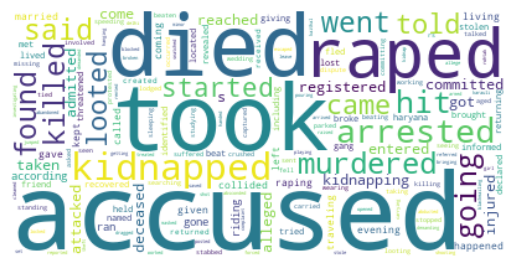

In [31]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [63]:
hindi_text= " ".join(list(df['hindi']))
hindi_text

'सोनीपत में दो बच्चों पांच साल के लड़के और दो साल की लड़की का कथित तौर पर\nदोपहर करीब 2.30 बजे अपहरण कर लिया गया. यह घटना तब हुई जब वे खेल रहे थे\nऔर माता-पिता काम पर गए थे. पंचकुला में जहां शादी की पूर्व संध्या पर दुल्हन के पड़ोसी ने उसके पिता की कथित तौर पर हत्या कर दीपड़ोसी जिसनु ने 27 जून को 61 वर्षीय राजू की कथित तौर पर हत्या कर दी. पीड़ित के रिश्ते के भाई ने संवाददाताओं को बताया कि शादी की पूर्व संध्या पर रस्में खत्म होने के बाद आरोपी ने अपने भाई जिजिन और दो दोस्तों श्याम और मनु के साथ दुल्हन के परिवार पर हमला कर दिया. शादी शिवगीरी में सुबह 11 बजकर 10 मिनट पर होनी थी. आरोपी का परिवार दो वर्ष पूर्व पीड़ित की बेटी के लिए विवाह का प्रस्ताव लेकर आया था जिसे पीड़ित ने नकार दिया था. आरोपी का परिवार दो वर्ष पूर्व पीड़ित की बेटी के लिए विवाह का प्रस्ताव लेकर आया था जिसे पीड़ित ने नकार दिया था. सोनीपत से अपने रिश्तेदार के सात वर्षीय बच्चे का अपहरण करने के बाद बच्चे को अंबाला रेलवे स्टेशन से बरामद किया. राजमिस्त्री का काम करने वाले 45 वर्षीय एक व्यक्ति ने दो साल पहले अपनी सास को दो लाख रुप

In [65]:
hindi_words= hindi_text.split(' ')
hindi_words

['सोनीपत',
 'में',
 'दो',
 'बच्चों',
 'पांच',
 'साल',
 'के',
 'लड़के',
 'और',
 'दो',
 'साल',
 'की',
 'लड़की',
 'का',
 'कथित',
 'तौर',
 'पर\nदोपहर',
 'करीब',
 '2.30',
 'बजे',
 'अपहरण',
 'कर',
 'लिया',
 'गया.',
 'यह',
 'घटना',
 'तब',
 'हुई',
 'जब',
 'वे',
 'खेल',
 'रहे',
 'थे\nऔर',
 'माता-पिता',
 'काम',
 'पर',
 'गए',
 'थे.',
 'पंचकुला',
 'में',
 'जहां',
 'शादी',
 'की',
 'पूर्व',
 'संध्या',
 'पर',
 'दुल्हन',
 'के',
 'पड़ोसी',
 'ने',
 'उसके',
 'पिता',
 'की',
 'कथित',
 'तौर',
 'पर',
 'हत्या',
 'कर',
 'दीपड़ोसी',
 'जिसनु',
 'ने',
 '27',
 'जून',
 'को',
 '61',
 'वर्षीय',
 'राजू',
 'की',
 'कथित',
 'तौर',
 'पर',
 'हत्या',
 'कर',
 'दी.',
 'पीड़ित',
 'के',
 'रिश्ते',
 'के',
 'भाई',
 'ने',
 'संवाददाताओं',
 'को',
 'बताया',
 'कि',
 'शादी',
 'की',
 'पूर्व',
 'संध्या',
 'पर',
 'रस्में',
 'खत्म',
 'होने',
 'के',
 'बाद',
 'आरोपी',
 'ने',
 'अपने',
 'भाई',
 'जिजिन',
 'और',
 'दो',
 'दोस्तों',
 'श्याम',
 'और',
 'मनु',
 'के',
 'साथ',
 'दुल्हन',
 'के',
 'परिवार',
 'पर',
 'हमला',
 'कर',
 'दिया.',
 'शादी',
 'शिव

In [67]:
from collections import Counter 
cnt = Counter(hindi_words)

cnt.most_common(10)

[('के', 860),
 ('में', 716),
 ('की', 583),
 ('को', 456),
 ('ने', 431),
 ('से', 390),
 ('एक', 339),
 ('पर', 264),
 ('और', 249),
 ('कर', 236)]

In [68]:
from spacy.lang.hi import STOP_WORDS as STOP_WORDS_HI
not_stop_words = [word for word in hindi_words if word not in set(STOP_WORDS_HI) ]

non_stop_cnt = Counter(not_stop_words)

non_stop_cnt.most_common(10)

[('है.', 108),
 ('हरियाणा', 100),
 ('पुलिस', 95),
 ('महिला', 94),
 ('है।', 91),
 ('मौत', 81),
 ('गांव', 79),
 ('हत्या', 74),
 ('साल', 68),
 ('उसकी', 65)]

In [90]:
from nltk.tag import tnt 
from nltk.corpus import indian 
train_data = indian.tagged_sents('hindi.pos') 
tnt_pos_tagger = tnt.TnT() 
tnt_pos_tagger.train(train_data)

In [91]:
tagged_words = (tnt_pos_tagger.tag(nltk.word_tokenize(hindi_text))) 
print(tagged_words)

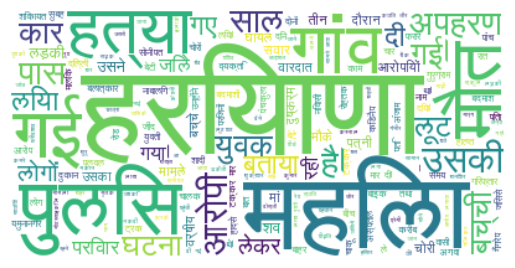

In [82]:
wordcloud = WordCloud(
    # width=400,
    # height=300,
    # max_font_size=50, 
    # max_words=1000,
    background_color="white", 
    stopwords=STOP_WORDS_HI,
        regexp=r"[\u0900-\u097F]+", 

    font_path="C:\\Users\\Garima\\OneDrive\\Desktop\\Hindi Fonts\\Gargi.ttf",
).generate(hindi_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()